# Statistics Exam  
## Karzanov Daniil 182

##### About the structure of this report. As far as I understand, the aim of this exam is to show what we have learnt during this year. Therefore, I believe it makes sense to structure this report in the following way. At the begging of a question I discuss my approach, then implement it in python, support with visualisation where it is necessary and finally, what is the most important provide my reasonings and analysis.

In [545]:
import statsmodels.api as sm
from scipy.stats import norm
import pylab
import csv
import pandas as pd
import numpy as np
from statistics import stdev
from scipy.stats import norm
from matplotlib import pyplot as plt
import seaborn as sns
from numpy.random import seed
from numpy.random import randn
from scipy.stats import normaltest
from scipy.stats import chisquare
from scipy.stats import chi2, t
import scipy as sp

Obtaining Data From CSV File:

In [546]:
alpha = 0.05
id_list = [] 
region = []
sex = []
income = []
isMarried = []
nchildren = []
religious = []
education = []
occupation = []
rate_marriage = []
naffairs = []
SIZE = 0
#getting data
with open('sxof_data.csv', 'r') as file:
    reader = csv.DictReader(file, delimiter=';')
    
    for row in reader:
        SIZE +=1
        id_list.append(int(row["id"]))
        region.append(float(row["region"]))
        sex.append(float(row["sex"]))
        income.append(float(row["income"].replace(",", ".")))
        isMarried.append(float(row["isMarried"]))
        nchildren.append(float(row["nchildren"]))
        religious.append(float(row["religious"]))
        education.append(float(row["education"]))
        occupation.append(float(row["occupation"]))
        rate_marriage.append(float(row["rate_marriage"]))
        naffairs.append(float(row["naffairs"]))



In [547]:
plt.style.use("tableau-colorblind10")

# Problem 1

#### a) You are proposed to study the problem set 

#### b) Test the null hypothesis that income has normal distribution 

Firstly, let us visualize the data:

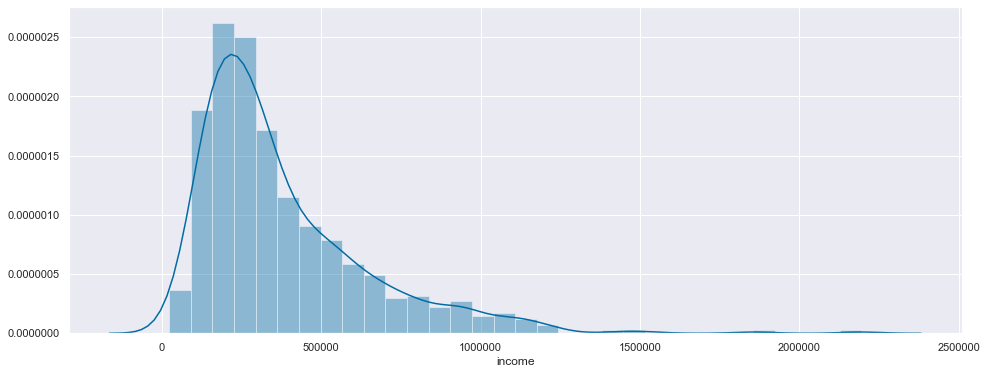

In [548]:
plt.figure(figsize=(16, 6))
data = norm.rvs(size=len(income))
sns.distplot(income)
plt.xlabel("income")
plt.show()

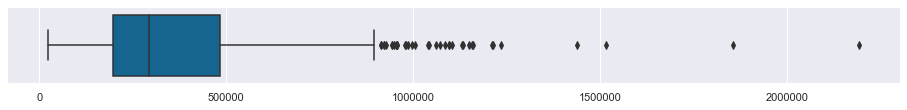

In [549]:
plt.figure(figsize=(16, 1.4))
boxplt1 = sns.boxplot(income)

The data is right skewed with a big number of outliers and extreme outlier on the right and none on the left. The minimum income is approximately 20000 and the maximal is roughly 2000000 and median 1100000. From both histogram and boxplot, we can assume that income is not normally distributed in this dataset. Let us prove that using p-value: 

Let us state the null and alternative hypotheses:

$H_0:$ The data represents a Normal distribution.

$H_1:$ The data does not represent a normal distribution.

In [550]:
stat, p = normaltest(income)
print("p-value =", p)
if p > alpha:
    print('Do not reject H0. Sample seems Normally distributed')
else:
    print('Reject H0. Sample does no seem Normally distributed')

p-value = 7.175561740356622e-56
Reject H0. Sample does no seem Normally distributed


#### c) Test the null hypothesis that income has log-normal distribution  

$H_0:$ The data represents a Log-normal distribution.

$H_1:$ The data does not represent a Log-normal distribution.

We reject the null hypothesis if p-value is less than the significance level. Do not reject otherwise.

Note the the graph seems to illustrate log-normal distribution. Let us check with the following test:

In [551]:
inc = [np.log(i) for i in income]
p = normaltest(inc)[1]
print("p-valuse =", p)
if p > alpha:
    print(f'Do not reject H_0 at alpha = 0.05')
else:
    print(f'reject H_0 at alpha = 0.05')

p-valuse = 0.819955909214327
Do not reject H_0 at alpha = 0.05


So it is Log-normally distributed.

# Problem 2

#### a) Does the proportion of female households vary among various regions? 

$H_0:$ The proportion of female households is the same among various regions

$H_1:$ The proportion of female households vary among various regions

We obtain number of women in the regions:

In [552]:
#2a
#getting # of women in the regions
get_reg_female = 0
region_female = {1: 0, 2: 0, 3: 0 }
while get_reg_female < SIZE:
    region_female[region[get_reg_female]] += sex[get_reg_female]
    get_reg_female +=1


Calculate the expected values and $\chi^2 = \sum_i^n\frac{(O_i-E_i)^2}{E_i}$

In [553]:
expected_female_region = sum(region_female.values())/3
chi_sq = chisquare(list(region_female.values()), [expected_female_region for i in [1,2,3]])
print("Observed:",region_female[1], region_female[2], "\t"+ str(region_female[3]), sep="\t\t")
print("Expected:",expected_female_region, expected_female_region, expected_female_region, sep="\t")

Observed:		102.0		89.0			95.0
Expected:	95.33333333333333	95.33333333333333	95.33333333333333


In [554]:
chi_crit_value = chi2.ppf(1- alpha, df = 2)
print("chisquared stat = ", chi_sq.statistic)
print("chisquared critical = ", chi_crit_value)
if chi_crit_value > chi_sq.statistic:
    print("Do not reject null hypothesis. The proportion of female households does not vary among various regions.")
else:
    print("Reject the null hypothesis and say the proportion of female households vary among various regions.")

chisquared stat =  0.8881118881118882
chisquared critical =  5.991464547107979
Do not reject null hypothesis. The proportion of female households does not vary among various regions.


#### b) Is number of children associated with regions? 

We will use no-association Chi-Square test:

$H_0:$ There is no association between number of children and region.

$H_1:$ There is association between number of children and region.

Getting number of children in each region:

In [555]:
#2b
get_dict_region = 0
region_child = {1: 0, 2: 0, 3: 0 }
while get_dict_region < SIZE:
    region_child[region[get_dict_region]] += nchildren[get_dict_region]
    get_dict_region +=1
    

Making the table of observed and expected values and obtaining $\chi^2$:

In [556]:
expected_child_region = sum(region_child.values())/3
print("Observed:",region_child[1], region_child[2], "\t"+str(region_child[3]), sep="\t\t")
print("Expected:",expected_child_region, expected_child_region, expected_child_region, sep="\t")

Observed:		144.0		135.0			151.0
Expected:	143.33333333333334	143.33333333333334	143.33333333333334


In [557]:
chi_sq = chisquare(list(region_child.values()), [expected_child_region for i in [1,2,3]])

In [558]:
chi_crit_value = chi2.ppf(1- alpha, df = 2)
print("chisquared stat = ", chi_sq.statistic)
print("chisquared critical = ", chi_crit_value)
if chi_crit_value > chi_sq.statistic:
    print("Do not reject null hypothesis. There is no association between region and number of children.")
else:
    print("Reject the null hypothesis and say there is assocation between region and number of children.")

chisquared stat =  0.897674418604651
chisquared critical =  5.991464547107979
Do not reject null hypothesis. There is no association between region and number of children.


#### c) Are religious preferences associated with regions? 

$H_0:$ There is no association between religion and region.

$H_1:$ There is association between religion and region.

Let us prepare function  which works with tables and calculates chisquared $\chi^2 = \sum_r \sum_c \frac{(O_{rc}- E_{rc})^2}{E_{rc}} $:

In [559]:
def calc(a,m,x, text):
    if m == 1:
        s = 0
        aver = sum(x[0])/len(x[0])
        for i in x[0]:
            s += (i - aver)**2
        s *= 1/(len(x[0])-1)
        s = s**0.5
        df = 1
        ans = chi2.ppf(a/2, df)
        ans1 = chi2.ppf(1-a/2, df)
        print("form:",ans)
        print("to:",ans1)
        if ans1 > s and ans < s:
            print("Do not reject, insignificant")
        else:
            print("Reject, significant")
    else:
        sum1 = []
        sum2 = []
        for row in x:
            sum1.insert(len(sum1),sum(row))
        for i in range(len(x[0])):
            temp = 0
            for j in range(m):
                #print(x)
                temp += x[j][i]
            sum2.insert(len(sum2), temp)
        ex = [[]]
        row = 0
        all = sum(sum1)
        for i in range(m):
            for k in range(len(x[i])):
                ex[row].insert(len(x[row]), (sum1[i]*sum2[k])/all)
            ex.insert(len(ex),[])
            row += 1
        ex.pop()
        ch2 = 0
        for i in range(m):
            for j in range(len(x[0])):
                ch2 += (x[i][j] - ex[i][j])**2/ex[i][j]
        print("chi^2 stat =", ch2)
        df = (len(x[0])-1)*(m-1)
        ans1 = chi2.ppf(1-a, df)
        print("chi^2 crit value =", ans1)
        if ans1 > ch2:
            print("Do not reject H0 - there is no association " + text)
        else:
            print("Reject H0 - there is association " + text)

We create a table which contains the amount of each 5 religion preferences in each 3 regions:

In [560]:
#2c
#getting table
get_reg_rel = 0
region1_religion = {1: 0, 2: 0, 3: 0, 4: 0, 5: 0}
region2_religion = {1: 0, 2: 0, 3: 0, 4: 0, 5: 0}
region3_religion = {1: 0, 2: 0, 3: 0, 4: 0, 5: 0}
while get_reg_rel < SIZE:
    if region[get_reg_rel] == 1:
        region1_religion[religious[get_reg_rel]] +=1
    elif region[get_reg_rel] == 2:
        region2_religion[religious[get_reg_rel]] +=1
    elif region[get_reg_rel] == 3:
        region3_religion[religious[get_reg_rel]] +=1
    get_reg_rel +=1
table = [list(region1_religion.values()),
        list(region2_religion.values()),
        list(region3_religion.values())]


In [561]:
calc(alpha, 3, table, "between region and religion.")

chi^2 stat = 4.321603370529665
chi^2 crit value = 15.50731305586545
Do not reject H0 - there is no association between region and religion.


#### d) Is occupation associated with regions? 

$H_0:$ There is no association between occupation and region.

$H_1:$ There is association between occupation and region.

We create a table which contains the amount of each 5 щссгзфешщты in each 3 regions:

In [562]:
#2d
#getting table
region1_occup = {1: 0, 2: 0, 3: 0, 4: 0, 5: 0}
region2_occup = {1: 0, 2: 0, 3: 0, 4: 0, 5: 0}
region3_occup = {1: 0, 2: 0, 3: 0, 4: 0, 5: 0}
for i in range(SIZE):
    if region[i] == 1:
        region1_occup[occupation[i]] +=1
    elif region[i] == 2:
        region2_occup[occupation[i]] +=1
    elif region[i] == 3:
        region3_occup[occupation[i]] +=1
    
table = [list(region1_occup.values()),
        list(region2_occup.values()),
        list(region3_occup.values())]


In [563]:
calc(alpha, 3, table, "between region and occupation.")

chi^2 stat = 12.941064218453132
chi^2 crit value = 15.50731305586545
Do not reject H0 - there is no association between region and occupation.


#### e) Is the length of marriage associated with the gender? 

$H_0:$ There is no association between length of marriage and gender.

$H_1:$ There is association between length of marriage and gender.

In [564]:
#2e
male = {1: 0, 2: 0, 3: 0, 4: 0, 5: 0}
female = {1: 0, 2: 0, 3: 0, 4: 0, 5: 0}
for i in range(SIZE):
    
    if sex[i] == 0:
        male[rate_marriage[i]] +=1
    elif sex[i] == 1:
        female[rate_marriage[i]] +=1
table = [list(male.values()),
        list(female.values())]


In [565]:
calc(alpha, 2, table, "between rate of marrige and gender.")

chi^2 stat = 6.21282233959723
chi^2 crit value = 9.487729036781154
Do not reject H0 - there is no association between rate of marrige and gender.


#### f) Is the significant difference between the income of men and women? Please redo this analysis separately by regions.

$H_0:$ There is no difference between incomes of man and women (in Moscow/Tver/Pskov).

$H_1:$ There is a difference between incomes of man and women (in Moscow/Tver/Pskov).

Let's begin with calculating t-statistics for the whole sample: $$t_{stat} = \frac{\mu_m - \mu_w}{\sqrt{\frac{s_m^2}{n_m} + \frac{s_w^2}{n_w}}} $$ 

In [566]:
#2f
sample_mean_man = 0
n_m = 0
list_man = []
ln_list_man = []
mr1 = []
mr2 = []
mr3 = []

sample_mean_woman = 0
n_w = 0
list_woman = []
ln_list_woman = []
wr1 = []
wr2 = []
wr3 = []

for i in range(SIZE):
    if sex[i] == 0:
        n_m +=1
        list_man.append(income[i])
        ln_list_man.append(np.log(income[i]))
        
        if region[i] == 1:
            mr1.append(income[i])
        elif region[i] == 2:
            mr2.append(income[i])
        else:
            mr3.append(income[i])
    else:
        n_w +=1
        list_woman.append(income[i])
        ln_list_woman.append(np.log(income[i]))
        
        if region[i] == 1:
            wr1.append(income[i])
        elif region[i] == 2:
            wr2.append(income[i])
        else:
            wr3.append(income[i])
        
mean_man = sum(list_man)/n_m
variance_man = sum([((x - mean_man) ** 2) for x in list_man]) / (n_m - 1)
stddev_man = variance_man ** 0.5

mean_woman = sum(list_woman)/n_w
variance_woman = sum([((x - mean_woman) ** 2) for x in list_woman]) / (n_w - 1)
stddev_woman = variance_woman ** 0.5



t_stat = (mean_man - mean_woman)/(variance_man/n_m + variance_woman/n_w)**0.5
t_crit = t.ppf(1-alpha/2, min(n_m,n_w) - 1)
print("t-stat = ", t_stat)
print("t_crit = ", t_crit)
if - t_crit < t_stat < t_crit:
    print("Do not reject H0 and say there is no difference between incomes of man and women.")
else:
    print("Reject H0 and say there is a difference between incomes of man and women.")

t-stat =  1.088210659610165
t_crit =  1.9683226030283758
Do not reject H0 and say there is no difference between incomes of man and women.


Let us perform the same procedure in Moscow:

In [567]:
#region 1
mean_m = np.mean(mr1)
std_m = np.std(mr1, ddof=1)

mean_w = np.mean(wr1)
std_w = np.std(wr1, ddof=1)

t_stat = (mean_m- mean_w)/np.sqrt(std_m**2/len(mr1) + std_w**2/len(wr1))

print("t-stat = ", t_stat)
print("t_crit = ", t_crit)
if (-1)*t_crit < t_stat < t_crit:
    print("Do not reject H0 and say there is no difference between incomes of man and women in region 1.")
else:
    print("Reject H0 and say there is a difference between incomes of man and women in region 1.")

t-stat =  0.22553455119711685
t_crit =  1.9683226030283758
Do not reject H0 and say there is no difference between incomes of man and women in region 1.


In Tver:

In [568]:
#region 2
mean_m = np.mean(mr2)
std_m = np.std(mr2, ddof=1)

mean_w = np.mean(wr2)
std_w = np.std(wr2, ddof=1)
print(mean_m, std_m, mean_w, std_w)
t_stat = (mean_m- mean_w)/(std_m**2/len(mr2) + std_w**2/len(wr2))**0.5

print("t-stat = ", t_stat)
print("t_crit = ", t_crit)
if (-1)*t_crit < t_stat < t_crit:
    print("Do not reject H0 and say there is no difference between incomes of man and women in region 2.")
else:
    print("Reject H0 and say there is a difference between incomes of man and women in region 2.")

417346.7338275238 322430.5761880043 358409.7382561798 265601.0015077586
t-stat =  1.3958678914382954
t_crit =  1.9683226030283758
Do not reject H0 and say there is no difference between incomes of man and women in region 2.


In Pskov:

In [569]:
#region 3
mean_m = np.mean(mr3)
std_m = np.std(mr3)

mean_w = np.mean(wr3)
std_w = np.std(wr3)

t_stat = (mean_m- mean_w)/(std_m**2/len(mr3) + std_w**2/len(wr3))**0.5

print("t-stat = ", t_stat)
print("t_crit = ", t_crit)
if (-1)*t_crit < t_stat < t_crit:
    print("Do not reject H0 and say there is no difference between incomes of man and women in region 3.")
else:
    print("Reject H0 and say there is a difference between incomes of man and women in region 3.")

t-stat =  0.12204444913956775
t_crit =  1.9683226030283758
Do not reject H0 and say there is no difference between incomes of man and women in region 3.


#### g) Is the significant difference between the ln(income) of men and women? 

$H_0:$ There is no difference between ln(income) of man and women.

$H_1:$ There is a difference between ln(income) of man and women.

My approach is same as in the previous item, however I use natural logarithm on each element of data (on each income):

In [570]:
#2g
mean_m = np.mean(ln_list_man)
std_m = np.std(ln_list_man, ddof=1)

mean_w = np.mean(ln_list_woman)
std_w = np.std(ln_list_woman, ddof=1)

t_stat = (mean_m- mean_w)/(std_m**2/len(ln_list_man) + std_w**2/len(ln_list_woman))**0.5

print("t-stat = ", t_stat)
print("t_crit = ", t_crit)
if (-1)*t_crit < t_stat < t_crit:
    print("Do not reject H0 and say there is no difference between ln incomes of man and women.")
else:
    print("Reject H0 and say there is a difference between ln incomes of man and women.")

t-stat =  0.6988658334405258
t_crit =  1.9683226030283758
Do not reject H0 and say there is no difference between ln incomes of man and women.


#### h) Please test any hypothesis you are interested in. 

We are going to test association between number of children and marriage.
First things first, we obtain the corresponding data. Then we use $\chi^2$ statistics to test out hypothesis:

In [571]:
#2h
marr = 0
not_marr = 0

for i in range(SIZE):
    if isMarried[i]:
        marr += nchildren[i]
    else:
        not_marr += nchildren[i]
expected = (marr + not_marr)/2
chi_sq = chisquare([marr, not_marr], [expected, expected])
chi_crit_value = chi2.ppf(1- alpha, df = 1)
print("chisquared stat = ", chi_sq.statistic)
print("chisquared critical = ", chi_crit_value)
if chi_crit_value > chi_sq.statistic:
    print("Do not reject null hypothesis. There is no association between marriage and number of children.")
else:
    print("Reject the null hypothesis and say there is assocation between marriage and number of children.")

chisquared stat =  0.5953488372093023
chisquared critical =  3.841458820694124
Do not reject null hypothesis. There is no association between marriage and number of children.


#### i) Please estimate a linear regression model you are interested in. 

We are going to study the trade off between income and education by building linear regression line. It is usually assumed that high-educated people are more likely to be successful, hence richer. I want to check does it really correspond to our data. 

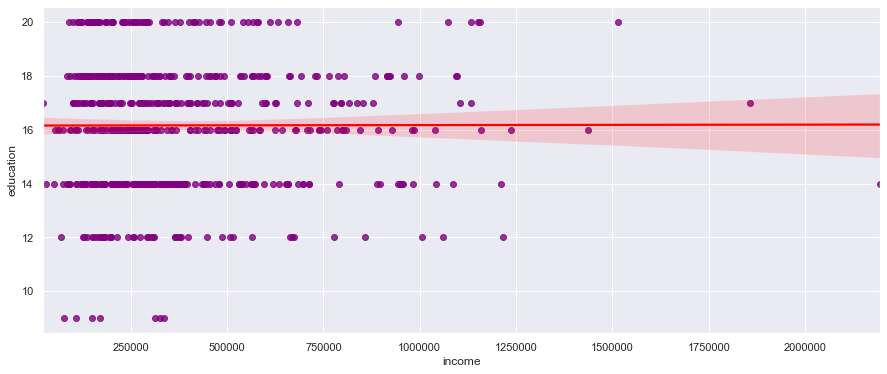

In [572]:
#2i income education
plt.figure(figsize=(15, 6))
sns.set(color_codes=True)
sns.regplot(x = income, y=education, color = "purple", line_kws={'color': 'red'});
xl1 = plt.xlabel("income")
yl1 = plt.ylabel("education")

As we can see, the regression model of form $ ax+b$ is not the best here. On the other hand, we have enough information to conclude that people with less than 10 years of education are very unlikely to be rich in the future. People with the biggest time spend in universities are not going to be poor, and not going to be very rich either. As the diagram shows people with about 16 years of education are very likely to be middle income population and here we can observe outliers as well.

# Problem 3 

#### a) Test the claim that on average the income at Moscow is greater than at Tver. 

Let us state the null and alternative hypotheses:

$H_0:$ The income at Moscow equals income at Tver. $\mu_m = \mu_t$

$H_1:$ The income at Moscow is greater than at Tver. $\mu_m > \mu_t$

In this task I am going to perform t-test again as I have done in the problem №2, the only difference is that the test is one-tailed now due to inequality, whereas in the second problem all the tests were two-tailed. It does not affect the statistics but the critical value:

In [573]:
#3a
mos_in = []
tvr_in = []
for i in range(SIZE):
    if region[i] == 1:
        mos_in.append(income[i])
    elif region[i] == 2:
        tvr_in.append(income[i])

mean_m = np.mean(mos_in)
std_m = np.std(mos_in, ddof=1)


mean_t = np.mean(tvr_in)
std_t = np.std(tvr_in, ddof=1)

t_stat = (mean_m - mean_t)/(std_m**2/len(mos_in) + std_t**2/len(tvr_in))**0.5

t_crit = t.ppf(1-alpha, min(len(mos_in),len(tvr_in)) - 1)
print("t-stat = ", t_stat)
print("t-crit = ", -t_crit)
if (-1)*t_crit < t_stat:
    print("Do not reject H0 and say the income at Moscow is not greater than at Tver.")
else:
    print("Reject H0 and say the income at Moscow is greater than at Tver.")

t-stat =  -0.8469505463374968
t-crit =  -1.6527870682085384
Do not reject H0 and say the income at Moscow is not greater than at Tver.


#### b) You noticed that a number of Python developers is 4 times greater than a number of data analysts. Please test this belief. 

$H_0:$ The number of Python developers is 4 times the number of data analysts. $p_p = 4p_d$

$H_1:$ The number of Python developers is 4 times greater than a number of data analysts. $p_p > 4p_d$

We will use the Z-score for proportions $Z_{stat} =\frac{p_1-p_2}{\sqrt{p(1-p)(\frac{1}{n_1}+\frac{1}{n_2})}} $ where $ p = \frac{p_1*n_1 + p_2*n_2}{n_1 +n_2}$.

In [574]:
#3b check proportion
python = 0
ds = 0
for i in range(SIZE):
    if occupation[i] == 3:
        python+=1
    elif occupation[i] == 2:
        ds+=1

p_p = python/SIZE
p_d = ds/SIZE
p = 0.5*(python + 4*ds)/SIZE
z_stat = (p_p - 4*p_d)/(p*(1-p) * 2/SIZE)**0.5
z_crit = norm.ppf(1-alpha)
print("z-stat = ", z_stat)
print("z-crit = ", z_crit)
if z_stat < z_crit:
    print("Do not reject H0 and say that a number of Python developers is not 4 times greater than a number of data analysts.")
else:
    print("Reject H0 and say that a number of Python developers is 4 times greater than a number of data analysts.")

z-stat =  -26.274727369437183
z-crit =  1.6448536269514722
Do not reject H0 and say that a number of Python developers is not 4 times greater than a number of data analysts.


#### c) Test that there is no gender income gap inequality at regions. 

$H_0:$ There is no gender income gap inequality at regions. $\mu_m = \mu_w$

$H_1:$ There is gender income gap inequality at regions. $\mu_m \neq \mu_w$

In [575]:
#3c
n_m = 0
list_man = []
n_w = 0
list_woman = []

for i in range(SIZE):
    if sex[i] == 0:
        n_m +=1
        list_man.append(income[i])
        ln_list_man.append(np.log(income[i]))
        
        if region[i] == 1:
            mr1.append(income[i])
        elif region[i] == 2:
            mr2.append(income[i])
        else:
            mr3.append(income[i])
    else:
        n_w +=1
        list_woman.append(income[i])
        ln_list_woman.append(np.log(income[i]))
        
        if region[i] == 1:
            wr1.append(income[i])
        elif region[i] == 2:
            wr2.append(income[i])
        else:
            wr3.append(income[i])
        
mean_man = sum(list_man)/n_m
variance_man = sum([((x - mean_man) ** 2) for x in list_man]) / (n_m - 1)
stddev_man = variance_man ** 0.5

mean_woman = sum(list_woman)/n_w
variance_woman = sum([((x - mean_woman) ** 2) for x in list_woman]) / (n_w - 1)
stddev_woman = variance_woman ** 0.5



t_stat = (mean_man - mean_woman)/(variance_man/n_m + variance_woman/n_w)**0.5
t_crit = t.ppf(1-alpha/2, min(n_m,n_w) - 1)
print("t-stat = ", t_stat)
print("t_crit = ", t_crit)
if - t_crit < t_stat < t_crit:
    print("Do not reject H0 and say there is no difference between incomes of man and women.")
else:
    print("Reject H0 and say there is a difference between incomes of man and women.")



t-stat =  1.088210659610165
t_crit =  1.9683226030283758
Do not reject H0 and say there is no difference between incomes of man and women.


We conclude that there is no gender income gap inequality at regions.

The following bar chart confirms the ideas above:


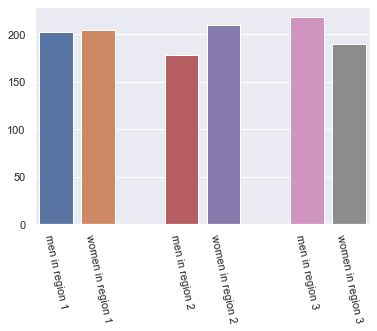

In [576]:
print("The following bar chart confirms the ideas above:")
bar = sns.barplot(x=["men in region 1","women in region 1"," ","men in region 2","women in region 2","","men in region 3","women in region 3"],
            y=[len(mr1),len(wr1), 0,len(wr2),len(mr2),0,len(mr3),len(wr3)])
tt = bar.set_xticklabels(bar.get_xticklabels(),rotation=-78)

We can notice that, overall, none of groups (man, women) dominates in income.

#### d) Assuming that a proportion of male households with the income greater than 200 000 is 3 times greater than female households, please test this claim. 

$H_0:$ The proportion of male households with the income greater than 200 000 is 3 times proportion of female households. $p_m = 3p_w$

$H_1:$ The proportion of male households with the income greater than 200 000 is 3 times greater than female households. $p_m > 3p_w$

Let us use the Z-score $=\frac{p_1-p_2}{\sqrt{p(1-p)(\frac{1}{n_1}+\frac{1}{n_2})}}$

In [577]:
#3d             Assuming that a proportion of male households with the income greater 
#               than 200 000 is 3 times greater than female households, please test this claim. 
men = 0
women = 0
for i in range(SIZE):
    if sex[i] == 0 and income[i] > 200000:
        men+=1
    elif sex[i] == 1 and income[i] > 200000:
        women+=1
print(men, women)
p_m = men/SIZE
p_w = women/SIZE
p = 0.5*(men + 3*women)/SIZE
t_stat = (p_m - 3*p_w)/(p*(1-p) * 2/SIZE)**0.5
t_crit = t.ppf(1-alpha, min(men, women)-1)
print("t-stat = ", t_stat)
print("t-crit = ", t_crit)
if t_stat < t_crit:
    print("Do not reject H0 and say that a proportion of male households with the income greater than 200 000 is  not 3 times than female households.")
else:
    print("Reject H0 and say that a proportion of male households with the income greater than 200 000 is 3 times greater than female households.")        
        

234 205
t-stat =  -24.128816004093053
t-crit =  1.652357325965031
Do not reject H0 and say that a proportion of male households with the income greater than 200 000 is  not 3 times than female households.


#### e) Please divide the income into 4 intervals of the same length. Is the distribution of income similar within various occupations areas. 

My approach is to split the income in 4 equal segment and then calculate the number of each occupation in each income segment:

In [578]:
#3e Please divide the income into 4 intervals of the same length. Is the distribution of income similar within various occupations areas.
i1,i2,i3,i4 = [], [], [], []
ii1 = {1: 0, 2: 0,3: 0,4: 0,5: 0,}
ii2 = {1: 0, 2: 0,3: 0,4: 0,5: 0,}
ii3 = {1: 0, 2: 0,3: 0,4: 0,5: 0,}
ii4 = {1: 0, 2: 0,3: 0,4: 0,5: 0,}

min_in = min(income)
max_in = max(income)
step = (max_in - min_in)/4
q1 = min_in + step
q2 = (max_in + min_in)/2
q3 = max_in - step
occup = ["data engineers", "data analysts", "Python developer", "web developer", "business analyst"]

for i in range(SIZE):
    if income[i] < q1:
        i1.append(income[i])
        ii1[occupation[i]]+=1
    elif income[i] < q2:
        i2.append(income[i])
        ii2[occupation[i]]+=1
    elif income[i] < q3:
        i3.append(income[i])
        ii3[occupation[i]]+=1
    else:
        i4.append(income[i])
        ii4[occupation[i]]+=1

res1 = str(pd.Series(i1).describe()).split("\n")
res2 = str(pd.Series(i2).describe()).split("\n")
res3 = str(pd.Series(i3).describe()).split("\n")
res4 = str(pd.Series(i4).describe()).split("\n")
print("Comparison of the four income segments:")
print("Interval" + "\t" + "1"+ "\t\t\t" + "2"+ "\t\t\t\t" + "3"+ "\t\t\t\t" + "4")
for i in range(len(res1)-1):
    print(res1[i] + "\t\t" + res2[i] + "\t\t" + res3[i] + "\t\t" + res4[i])

Comparison of the four income segments:
Interval	1			2				3				4
count       487.000000		count    1.020000e+02		count    1.000000e+01		count    2.000000e+00
mean     273573.280228		mean     7.687262e+05		mean     1.234849e+06		mean     2.025190e+06
std      124064.021485		std      1.536304e+05		std      1.333663e+05		std      2.391577e+05
min       22748.900390		min      5.668667e+05		min      1.132054e+06		min      1.856080e+06
25%      176626.507800		25%      6.442371e+05		25%      1.152331e+06		25%      1.940635e+06
50%      257090.312500		50%      7.357778e+05		50%      1.185415e+06		50%      2.025190e+06
75%      353253.328150		75%      8.906285e+05		75%      1.230595e+06		75%      2.109745e+06
max      565174.375000		max      1.104350e+06		max      1.515049e+06		max      2.194300e+06


I reckon that visual representation is most appropriate here:

The distribution of income within four equal intervals


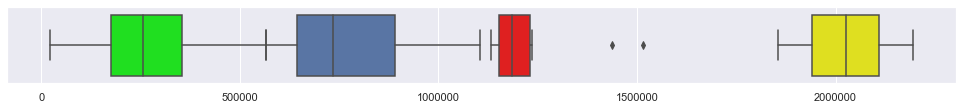

In [579]:
print("The distribution of income within four equal intervals")
plt.figure(figsize=(17, 1.4))
b1 = sns.boxplot(i1, color = "lime")
b2 = sns.boxplot(i2)
b3 = sns.boxplot(i3, color = "red")
b4 = sns.boxplot(i4, color = "yellow")


People with income from 22748.90039 to 565636.6752925


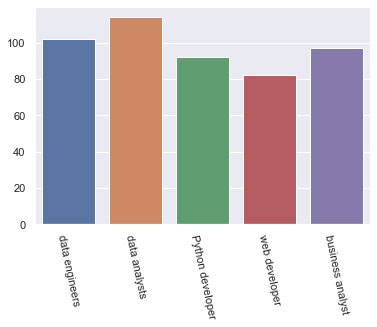

In [580]:
print(f"People with income from {min_in} to {q1}")
br1 = sns.barplot(x=occup, y=list(ii1.values()))
tt = br1.set_xticklabels(br1.get_xticklabels(),rotation=-78)


The lowest segment of income has approximately they same amount of all occupations.

People with income from 565636.6752925 to 1108524.450195


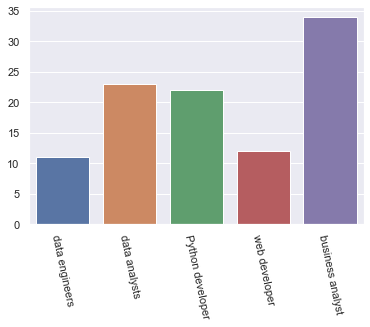

In [581]:
print(f"People with income from {q1} to {q2}")
br1 = sns.barplot(x=occup, y=list(ii2.values()))
tt = br1.set_xticklabels(br1.get_xticklabels(),rotation=-78)


As the bar chart show the number of business analyst prevails while data engineers and web developers have the smallest share.

People with income from 1108524.450195 to 1651412.2250975


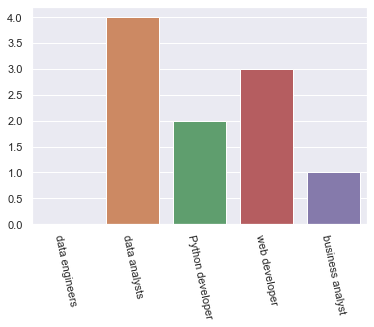

In [582]:
print(f"People with income from {q2} to {q3}")
br1 = sns.barplot(x=occup, y=list(ii3.values()))
tt = br1.set_xticklabels(br1.get_xticklabels(),rotation=-78)


Third interval illustrates that the amount of data analysts is the greatest in segment with income from $1108524$ to $1651412$. Business analysts experience sharp decline.

People with income from 1651412.2250975 to 2194300.0


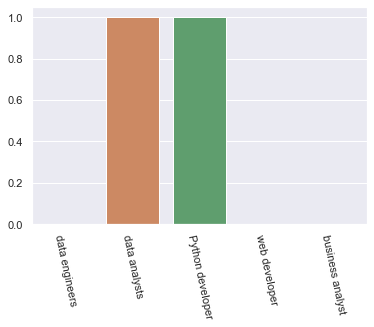

In [583]:
print(f"People with income from {q3} to {max_in}")
br1 = sns.barplot(x=occup, y=list(ii4.values()))
tt = br1.set_xticklabels(br1.get_xticklabels(),rotation=-78)


Finally, according to the bar chart only data analysts and Python developers are in the "highest" income segment.

Overall, we can use that data analysts and Python developers "perform well" in all four income segments. It means that choosing one of this professions, a pearson equally likely to be in one of the segment. That is he or she can be either rich or poor, I guess it depends on their effort and desire. Though, I cannot say the same about other occupations... 

# Problem 4 

##### Compute the maximum likelihood estimator for the unknown (one or two dimensional) parameter, based on a sample of n i.i.d. random variables with that distribution. In each case, is the Fisher information well defined ? If yes, compute it.  
 

a)

$$f_{\mu,\sigma^2}(x) = \frac{1}{x \sqrt{2 \pi \sigma^2}} e^{-\frac{1}{2\sigma^2}(\ln{x} -\mu)^2}$$ 
Let us write likelihood function of the given sample:
$$ l(\mu,\sigma^2) = \prod_{i=1}^{n} \frac{1}{x_i \sqrt{2 \pi \sigma^2}} e^{-\frac{1}{2\sigma^2}(\ln{x_i} -\mu)^2}$$
$$ ll(\mu,\sigma^2) = \sum_{i=1}^{n} \Big( \ln{\frac{1}{x_i \sqrt{2 \pi \sigma^2}}} -\frac{1}{2\sigma^2}(\ln{x_i} -\mu)^2 \Big)$$
Now, find the partial derivatives with respect to $\mu$ and $\sigma^2 $:
$$ \frac{d{ll(\mu)}}{d\mu} = \sum_{i=1}^{n} \frac{\ln{x_i}-\mu}{\sigma^2} = 0 \quad \implies \quad \ln{\prod_{i=1}^{n} x_i} = \hat{\mu}_{ml}$$
$$ \frac{d{ll(\sigma^2)}}{d\sigma^2} = \sum_{i=1}^{n} \Big( \frac{(\ln{x_i}-\mu)^2}{2\sigma^2} - \frac{1}{2\sigma^2} \Big) = 0 \quad \implies \quad \hat{\sigma^2_{ml}} = \sum_{i=1}^{n} (\ln{x_i}-\mu)^2$$
Let us find Fisher information for each estimator:
$$ \frac{d^2{ll(\mu)}}{d^2\mu} = \sum_{i=1}^{n} -\frac{1}{\sigma^2}= -\frac{n}{\sigma^2}  $$
Therefore:
$$I(\hat{\mu}_{ml}) = \frac{n}{\sigma^2}$$
$$ \\ $$
$$ \frac{d^2{ll(\sigma^2)}}{d^2\sigma^2} = \sum_{i=1}^{n}\Big(\frac{1}{2\sigma^2} - \frac{(\ln{x_i}-\mu)^2}{\sigma^6} \Big)$$
Hence:
$$ I(\hat{\sigma^2_{ml}}) = \frac{1}{\sigma^6} \sum_{i=1}^{n}{(\ln{x_i}-\mu)^2} - \frac{1}{2\sigma^2}$$





$ \quad$
$ \quad$

$$f_{\alpha ,\lambda }\left(x\right)=\lambda e^{-\lambda \left(x-\alpha \right)}1_{x\ge \alpha },\:\forall x\in \mathbb{R} $$
$$l(\alpha ,\lambda) = \prod_{i=1}^{n}\lambda e^{-\lambda}(x_i - a)$$
$$ll(\alpha ,\lambda) = \sum_{i=1}^{n}\ln{\lambda}-\lambda(x_i - a) $$
For $\lambda$:
$$ \frac{d{ll(\lambda)}}{d\lambda} = \sum_{i=1}^{n} (\frac{1}{\lambda} - x_i +a) = 0$$
$$ \frac{n}{\lambda} - n\bar{x} +an = 0 \quad \implies \quad \frac{1}{\lambda} = \bar{x} -a$$
$$ \hat{\lambda}_{ml} = \frac{1}{\bar{x}-a}$$
For $a$:
$$ \frac{d{ll(a)}}{d a} = \sum_{i=1}^{n}\lambda = n\lambda > 0 \quad \implies \quad \hat{a}_{ml} = min\{X_1,...,X_n\}$$
Fisher information for $\hat{a}_{ml}$ is not well defined **$\big(I(\hat{a}_{ml}) =0 \big)$